In [1]:
pip install pyforest


  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=cd8184cca21dac63dd64d68c609246a955aaa24a7d3c03e74515c106f4205784
  Stored in directory: c:\users\91739\appdata\local\pip\cache\wheels\d5\1a\3e\6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyforest import*
lazy_imports()

['from sklearn.linear_model import ElasticNet',
 'import statistics',
 'import nltk',
 'import matplotlib as mpl',
 'from sklearn import metrics',
 'import dash',
 'import spacy',
 'import awswrangler as wr',
 'from openpyxl import load_workbook',
 'from sklearn.linear_model import ElasticNetCV',
 'import cv2',
 'import gensim',
 'from sklearn.linear_model import Ridge',
 'import os',
 'import datetime as dt',
 'from sklearn.linear_model import RidgeCV',
 'import seaborn as sns',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.linear_model import LinearRegression',
 'import textblob',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import sklearn',
 'from sklearn.decomposition import PCA',
 'import imutils',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.model_selection import cross_val_score',
 'import tensorflow as tf',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import keras',
 'from sklearn.model_selection impo

In [11]:
Train_data=pd.read_csv("C:\\Users\\91739\\Desktop\\Technocolabs\\9961_14084_bundle_archive\\Train.csv")


<IPython.core.display.Javascript object>

In [12]:
Test_data=pd.read_csv("C:\\Users\\91739\\Desktop\\Technocolabs\\9961_14084_bundle_archive\\Test.csv")

<IPython.core.display.Javascript object>

In [13]:
Train_data=pd.read_csv("C:\\Users\\91739\\Desktop\\Technocolabs\\9961_14084_bundle_archive\\Train.csv")
Test_data=pd.read_csv("C:\\Users\\91739\\Desktop\\Technocolabs\\9961_14084_bundle_archive\\Test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
Train_data.head()
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [16]:
print('Train_data:',Train_data.shape)
print('Test_data:',Test_data.shape)

Train_data: (8523, 12)
Test_data: (5681, 11)


In [17]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [18]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [20]:
Train_data['source'] = 'train'
Test_data['source'] = 'test'
df=pd.concat([Train_data,Test_data], ignore_index=True)

<IPython.core.display.Javascript object>

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [22]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [24]:
df.shape

(14204, 13)

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

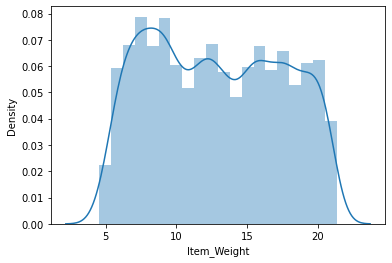

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

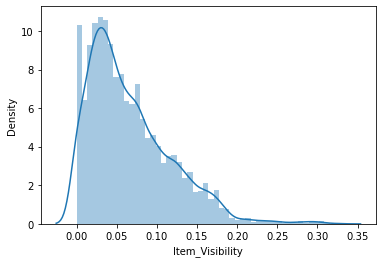

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

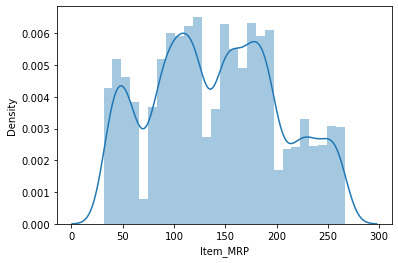

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

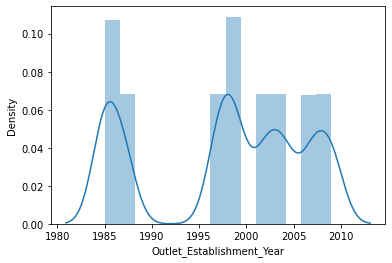

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

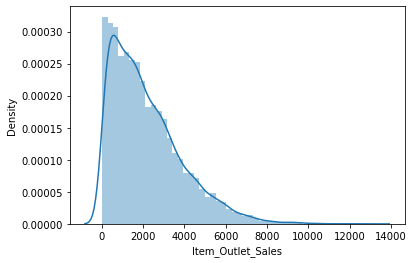

In [25]:
for i in Train_data.describe().columns:
  sns.distplot(Train_data[i].dropna())
  plt.show()

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

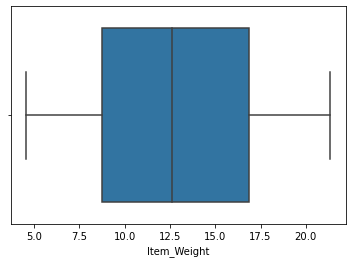

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

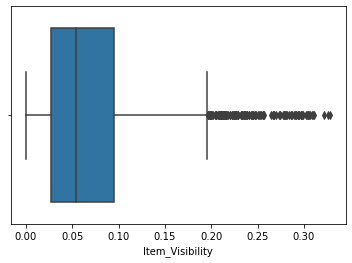

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

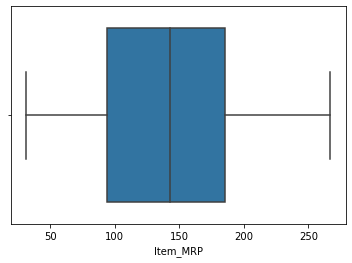

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

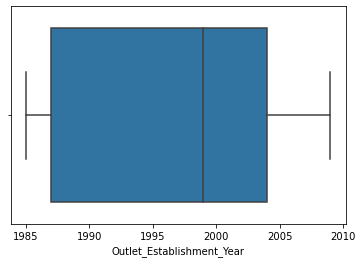

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

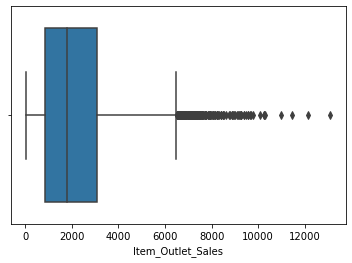

In [26]:
for i in Train_data.describe().columns:
  sns.boxplot(Train_data[i].dropna())
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

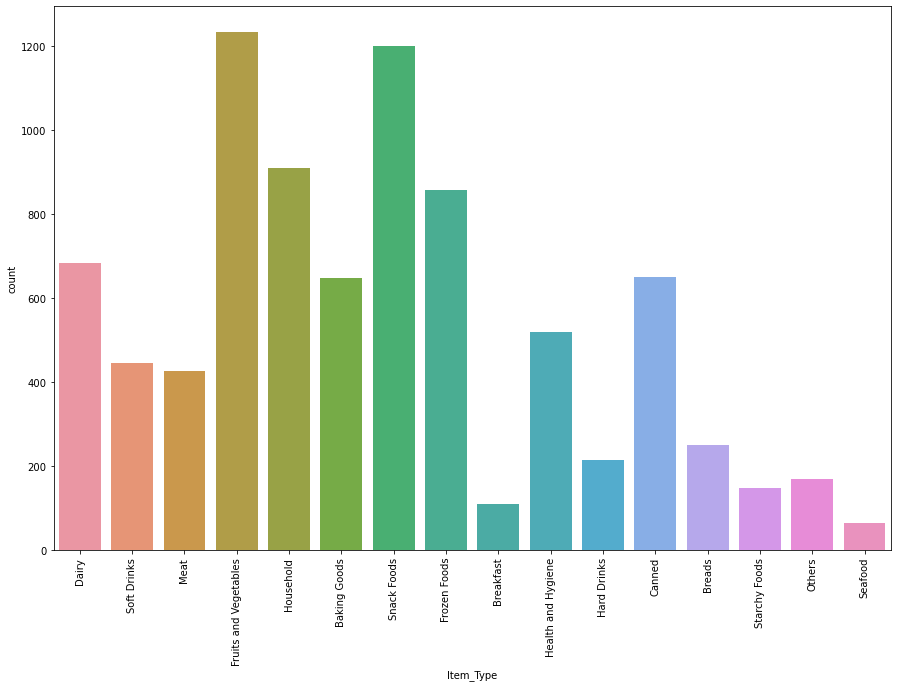

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(Train_data.Item_Type)
plt.xticks(rotation=90)

In [28]:
Train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

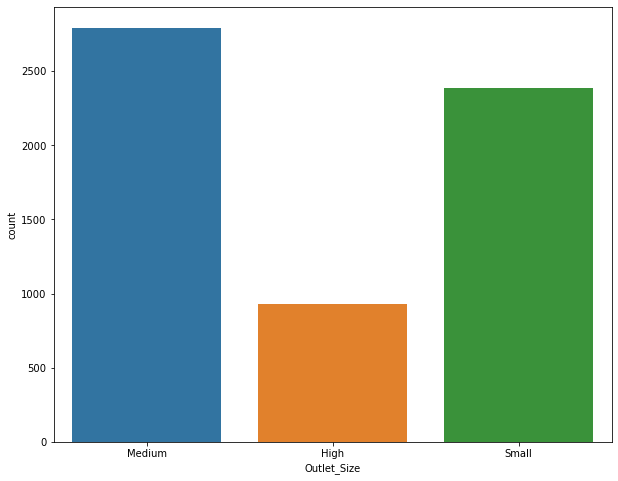

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Size)

In [30]:
Train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

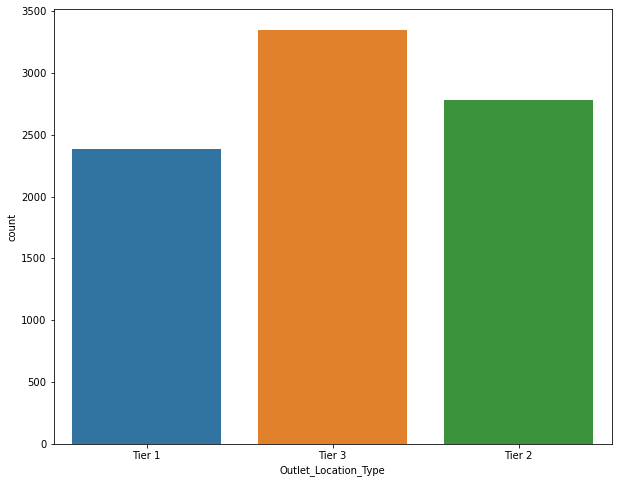

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Location_Type)

In [32]:
Train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\91739\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

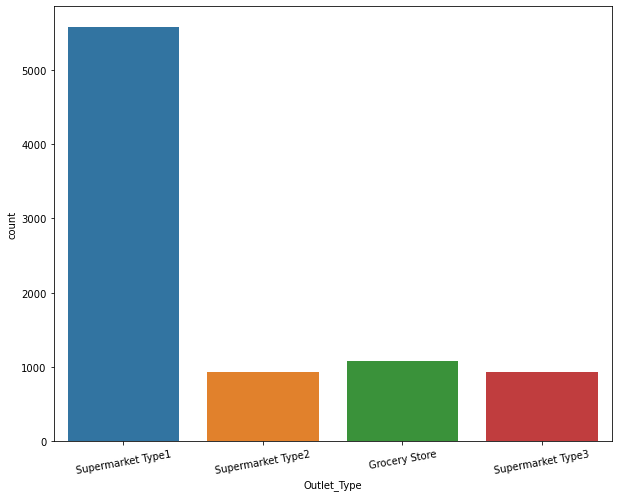

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Type)
plt.xticks(rotation=10)

In [34]:
Train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

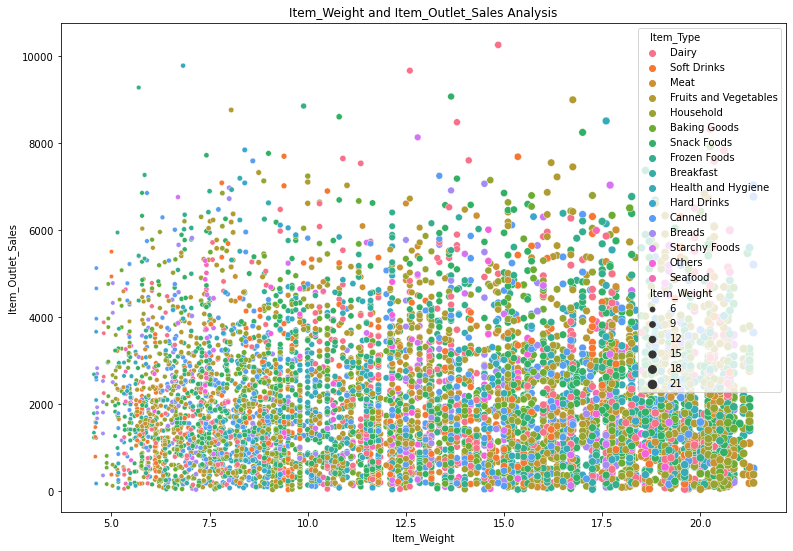

In [35]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=Train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

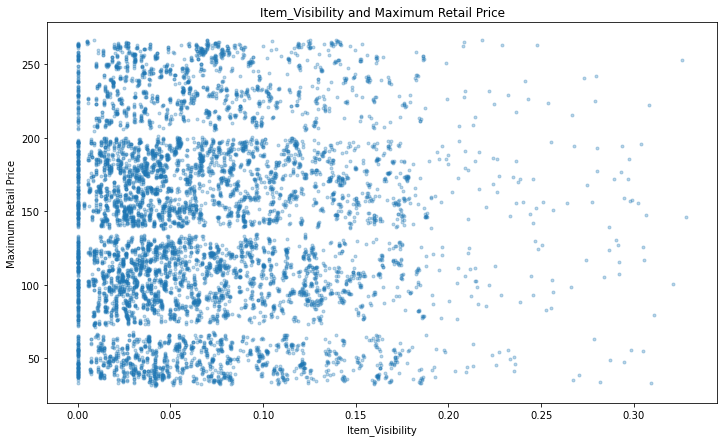

In [36]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(Train_data.Item_Visibility, Train_data.Item_MRP, ".",alpha = 0.3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

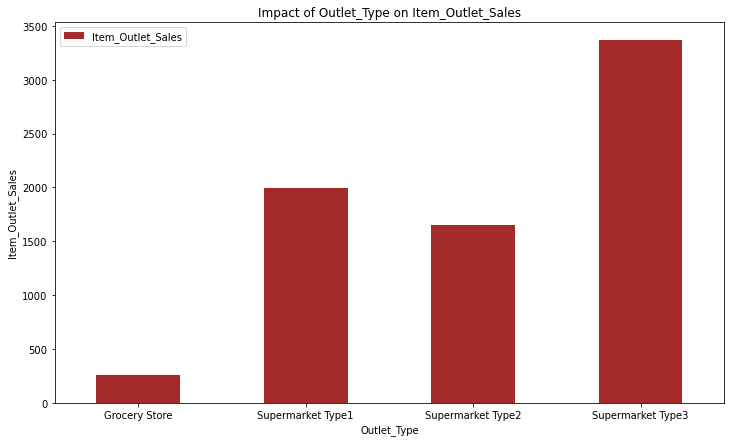

In [37]:
Item_Type_pivot = \
Train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

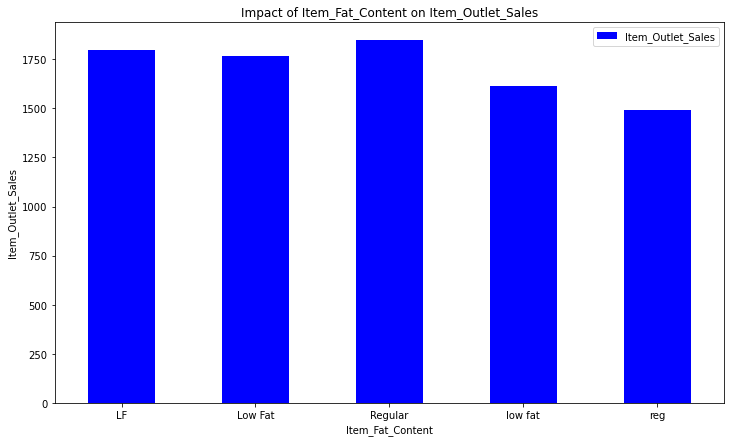

In [38]:
Item_Type_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [39]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [40]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

In [41]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [42]:
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

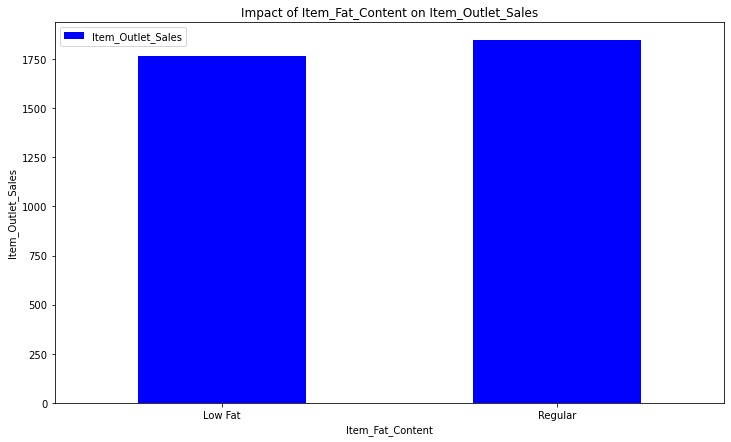

In [43]:
Item_Fat_Content_pivot =\
Train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [44]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

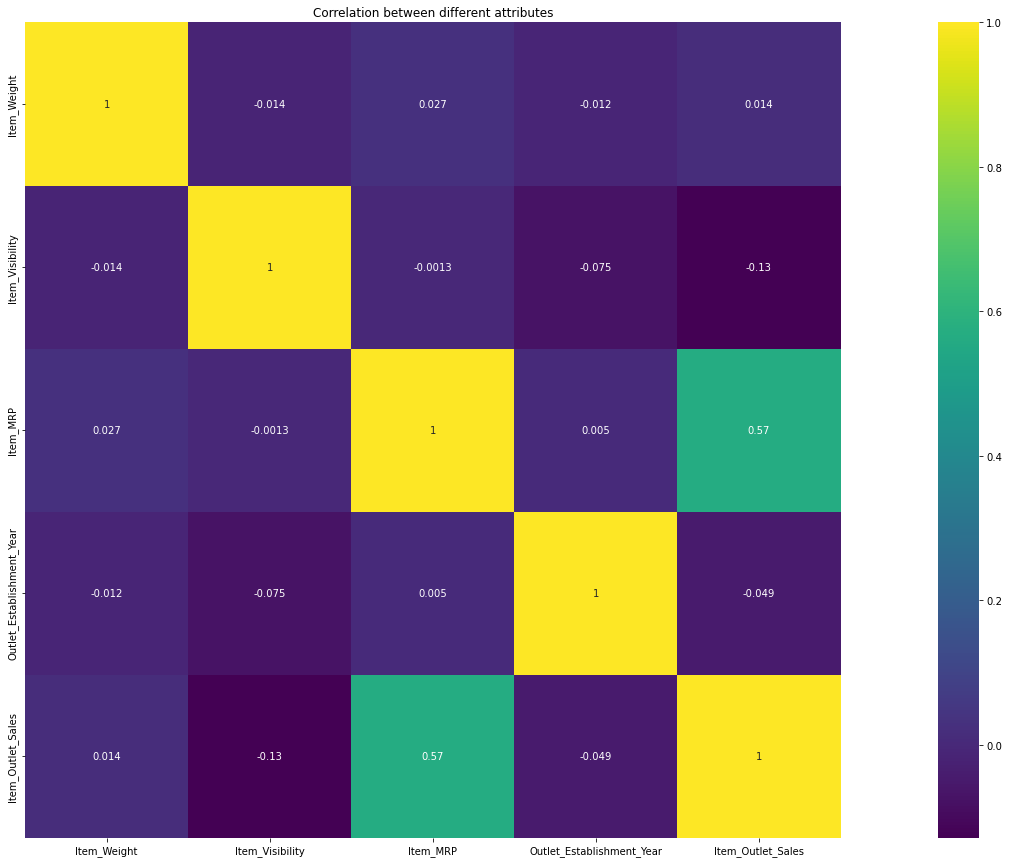

In [45]:
plt.figure(figsize=(35,15))
sns.heatmap(Train_data.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [47]:
df['Item_Weight'].mean() #we will replace the NaN values with this mean

12.792854228644991

In [48]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True) #missing values have been replaced with the mean using the fillna function.

In [49]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [50]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [51]:
df.isnull().sum() #now we do not have any null values in Outlet_Size

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [52]:
Train_data.shape

(8523, 13)

In [53]:
Test_data.shape

(5681, 12)

In [54]:
df.shape

(14204, 13)

In [55]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [56]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

In [57]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [58]:
df['Outlet_Years'] = 2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [59]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [60]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [61]:
#Changing only the first 2 characters (i.e. the category ID)

df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [62]:
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

In [63]:
df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']= "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [64]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [65]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [66]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,0.000000


In [68]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
  df[i] = label.fit_transform(df[i])

In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,0.000000,1


In [70]:
df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes 

<IPython.core.display.Javascript object>

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [ ]:
// MODEL BUILDING

In [71]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1, inplace=True)

In [72]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [73]:
train.drop(['source'],axis=1,inplace=True)

C:\Users\91739\AppData\Local\Temp\ipykernel_25344\3189634342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


In [74]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

C:\Users\91739\AppData\Local\Temp\ipykernel_25344\698445876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)


In [75]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)

lr.fit(X_train,y_train)

C:\Users\91739\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [77]:
lr_pred = lr.predict(X_test)

In [78]:
lr_pred

array([1844.08821509, 1569.9023178 , 1871.14116321, ..., 1805.82428049,
       3573.54521621, 1263.41875663])

In [79]:
lr_accuracy = round(lr.score(X_train,y_train)*100)
lr_accuracy

56

In [80]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

In [81]:
tree_pred

array([1649.67954808, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [82]:
tree_accuracy = round(tree.score(X_train,y_train)*100)
tree_accuracy

62

In [ ]:
RANDOM FOREST

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(X_train,y_train)

rf_accuracy = round(rf.score(X_train,y_train)*100)

rf_accuracy

61

In [98]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [93]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 100, learning_rate=0.05)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [94]:
y_pred = model.predict(X_test)
y_pred

array([1659.6506, 1297.625 ,  639.7941, ..., 1862.8121, 3716.712 ,
       1274.1649], dtype=float32)

In [97]:
model.score(X_train, y_train)*100

67.72716943174717